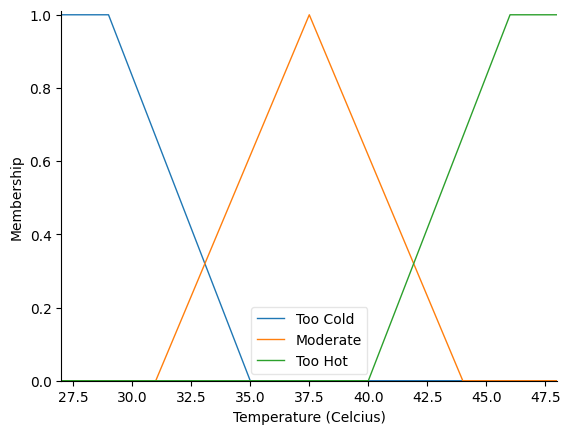

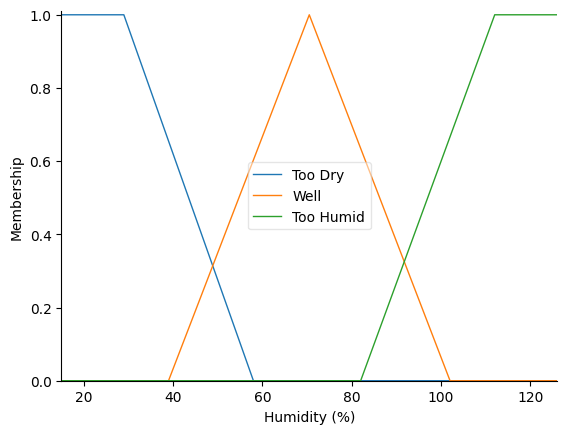

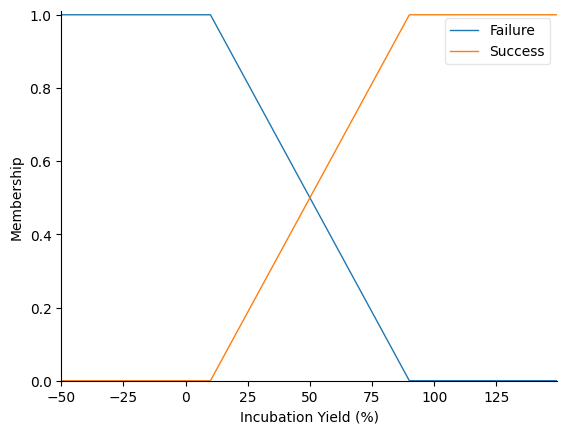

In [15]:
from urllib.request import urlopen
import urllib.request
import json

import numpy
import skfuzzy
import matplotlib.pyplot
from skfuzzy import control

url = "https://eggincubator-825e1-default-rtdb.firebaseio.com/.json"
response = urlopen(url)
jsonData = json.loads(response.read())

#Variables collected from the Json file
humid_data = jsonData["Humidity"]
temp_data = jsonData["Temperature"]

#Setting up the antecedent and consequent.
temp_fuzz = control.Antecedent(numpy.arange(27, 48.5, 0.5), 'Temperature (Celcius)')
humid_fuzz = control.Antecedent(numpy.arange(15, 126.5, 0.5), 'Humidity (%)')
incubation = control.Consequent(numpy.arange(-50, 150, 0.5), 'Incubation Yield (%)')

#Temperature Fuzzy Logic
temp_fuzz['Too Cold'] = skfuzzy.trapmf(temp_fuzz.universe, [26,26,29,35])
temp_fuzz['Moderate'] = skfuzzy.trimf(temp_fuzz.universe, [31,37.5,44])
temp_fuzz['Too Hot'] = skfuzzy.trapmf(temp_fuzz.universe, [40,46,49,49])

#Humidity Fuzzy Logic
humid_fuzz['Too Dry'] = skfuzzy.trapmf(humid_fuzz.universe, [14,14,29,58])
humid_fuzz['Well'] = skfuzzy.trimf(humid_fuzz.universe, [39,70.5,102])
humid_fuzz['Too Humid'] = skfuzzy.trapmf(humid_fuzz.universe, [82,112,127,127])

#Incubation Fuzzy Logic
incubation['Failure'] = skfuzzy.trapmf(incubation.universe, [-50,-50,10,90])
incubation['Success'] = skfuzzy.trapmf(incubation.universe, [10,90,150,150])

temp_fuzz.view()
humid_fuzz.view()
incubation.view()

37.4
50.3
56.872635953480646


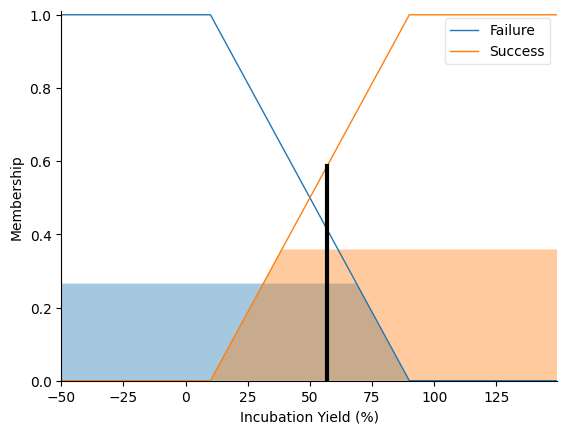

In [16]:
#Setting up the rules
rule1 = control.Rule(temp_fuzz['Moderate'] & humid_fuzz['Well'], incubation['Success'])
rule2 = control.Rule(temp_fuzz['Too Cold'] | temp_fuzz['Too Hot'] | humid_fuzz['Too Dry'] | humid_fuzz['Too Humid'], incubation['Failure'])
incu_yield = control.ControlSystemSimulation(control.ControlSystem([rule1,rule2]))

#Enter the antecedents and calculate the consequence.
incu_yield.input['Temperature (Celcius)'] = temp_data
incu_yield.input['Humidity (%)'] = humid_data
incu_yield.compute()
print(temp_data)
print(humid_data)
print(incu_yield.output['Incubation Yield (%)'])
incubation.view(sim=incu_yield)